Bag of Words Meets Bags of Popcorn : 
https://www.kaggle.com/c/word2vec-nlp-tutorial/data

지도학습 기반 감성 분석 실습 – IMDB 영화평 : https://github.com/wikibook/ml-definitive-guide/blob/master/8%EC%9E%A5/8.5%20%EA%B0%90%EC%84%B1%20%EB%B6%84%EC%84%9D.ipynb

In [1]:
import pandas as pd

review_df = pd.read_csv('D:\일학습과제2018\캐글\word2vec-nlp-tutorial\labeledTrainData.tsv', header=0, sep="\t", quoting=3)
review_df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


In [2]:
print(review_df['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [3]:
import re

# <br>html tag trans to "" with replace function
# <br>html 태그는 replace 함수로 공백으로 전환
review_df['review'] = review_df['review'].str.replace('<br />',' ')

# use re (regular expression?) trans everything except eng to ""
# 파이썬의 정규 표현식 모듈인 re를 이용해 영어 문자열이 아닌 문자는 모두 공백으로 변환
review_df['review'] = review_df['review'].apply( lambda x : re.sub("[^a-zA-Z]", " ", x) )


In [4]:
from sklearn.model_selection import train_test_split

# sentiment 추출하여 결정 값 데이터 세트
# sentiment 칼럼 삭제해 피처 데이터 세트 생성
class_df = review_df['sentiment']
feature_df = review_df.drop(['id', 'sentiment'], axis=1, inplace=False)

# train_test_split()로 학습용 테스트용 데이터 세트 분리
X_train, X_test, y_train, y_test = train_test_split(feature_df, class_df, test_size=0.3, random_state=156)

X_train.shape, X_test.shape

((17500, 1), (7500, 1))

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# stop word/CountVectorization: english, filtering. ngram=(1,2)
# 스톱 워드는 영어, 필터링, ngram은 (1,2)로 설정해 CountVectorization 수행
# LogisticRegression : C=10
# Pipeline 객체로 텍스트를 피처 벡터화하여 머신러닝 분류 알고리즘으로 예측 성능 측정
# ROC-AUC? https://bcho.tistory.com/tag/ROC%20curve 
pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words='english', ngram_range=(1,2) )),
    ('lr_clf', LogisticRegression(C=10))])

# using PipeLine Object. train/predict with fit(), predict() , predict_proba() for roc_auc
pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('predic accuracy is {0:.4f}, ROC-AUC is {1:.4f}'.format(accuracy_score(y_test , pred),
                                                             roc_auc_score(y_test, pred_probs)))

C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


predic accuracy is 0.8860, ROC-AUC is 0.9503


* ROC 그래프가 class 0, class 2, class 1 순서로 높은것을 볼 수 있다. 즉 이 모델은 class 0 을 제일 잘 분류하고 그 다음은 2,1 순서로 잘 분류 한다는 의미가 된다.

* ROC는 그래프이기 때문에, 모델을 정확도를 하나의 숫자로 나타내기 어려워서 AUC (Area Under Curve) 라는 값을 사용하는데, ROC AUC값은 ROC 그래프의 면적이 된다. 최대값은 1이 된다. 위의 그래프를 보면 모델 0,2,1의 AUC값은 0.91, 0.79, 0.60 이 된다. 

출처: https://bcho.tistory.com/tag/ROC curve [조대협의 블로그]

In [6]:
# stop word : english, filtering, ngram=(1,2) >>TF-IDF Vectorize
# LogisticRegression : C=10
# TF-IDF 벡터화로 다시 측정. 
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2) )),
    ('lr_clf', LogisticRegression(C=10))])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('predict accuracy is {0:.4f}, ROC-AUC is {1:.4f}'.format(accuracy_score(y_test , pred),
                                                              roc_auc_score(y_test, pred_probs)))

C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


predict accuracy is 0.8936, ROC-AUC is 0.9598


* 제출해서 점수를 한 번 봐보자.

In [7]:
test_df2 = pd.read_csv(r'D:\일학습과제2018\캐글\word2vec-nlp-tutorial\testData.tsv', header=0, sep="\t", quoting=3)
test_df2.head(3)

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."


In [8]:
pred = pipeline.predict(test_df2['review'])
#pred[0:3,:]


In [9]:
pred[0:3]

array([1, 0, 1], dtype=int64)

In [10]:
dd = pd.DataFrame()
dd['id'] = test_df2['id']
dd['sentiment'] = pred
dd.head(3)

,id,sentiment
0,"""12311_10""",1
1,"""8348_2""",0
2,"""5828_4""",1


In [11]:
import csv
dd.to_csv(r'D:\일학습과제2018\캐글\word2vec-nlp-tutorial\testSubmission.csv', index=False, quoting=csv.QUOTE_NONE)

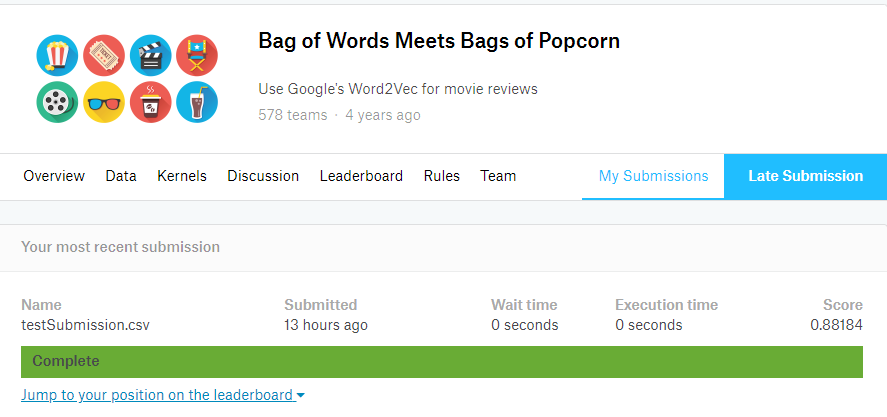
* first submit. 578명중 260등 정도 나온다
* 좀 더 개선을 해보자.


### 비지도학습 기반 감성 분석 소개
### SentiWordNet을 이용한 Sentiment Analysis
* WordNet Synset과 SentiWordNet SentiSynset 클래스의 이해

In [12]:
import nltk
#nltk.download('all')

In [13]:
from nltk.corpus import wordnet as wn

term = 'present'

# create synsets from wordnet with 'present'
synsets = wn.synsets(term)
print('synsets() return type :', type(synsets))
print('synsets() return val count :', len(synsets))
print('synsets() return val :', synsets)


synsets() return type : <class 'list'>
synsets() return val count : 18
synsets() return val : [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


In [14]:
for synset in synsets :
    print('##### Synset name : ', synset.name(),'#####')
    print('POS :',synset.lexname())
    print('Definition:',synset.definition())
    print('Lemas:',synset.lemma_names())

##### Synset name :  present.n.01 #####
POS : noun.time
Definition: the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemas: ['present', 'nowadays']
##### Synset name :  present.n.02 #####
POS : noun.possession
Definition: something presented as a gift
Lemas: ['present']
##### Synset name :  present.n.03 #####
POS : noun.communication
Definition: a verb tense that expresses actions or states at the time of speaking
Lemas: ['present', 'present_tense']
##### Synset name :  show.v.01 #####
POS : verb.perception
Definition: give an exhibition of to an interested audience
Lemas: ['show', 'demo', 'exhibit', 'present', 'demonstrate']
##### Synset name :  present.v.02 #####
POS : verb.communication
Definition: bring forward and present to the mind
Lemas: ['present', 'represent', 'lay_out']
##### Synset name :  stage.v.01 #####
POS : verb.creation
Definition: perform (a play), especially on a stage
Lemas: ['stage', 'present', 'represent']
##

In [15]:
#create each synset objects by words
tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree, lion, tiger, cat, dog]
similarities = []
entity_names = [entity.name().split('.')[0] for entity in entities]

# iterate each word's synset and compare similarity between other words
for entity in entities:
    similarity = [ round(entity.path_similarity(compared_entity), 2) for compared_entity in entities]
    similarities.append(similarity)
    
# save each word's synset and other word's synsets similarity in Dataframe
similarity_df = pd.DataFrame(similarities, columns = entity_names, index = entity_names)
similarity_df

,tree,lion,tiger,cat,dog
tree,1.00,0.07,0.07,0.08,0.12
lion,0.07,1.00,0.33,0.25,0.17
tiger,0.07,0.33,1.00,0.25,0.17
cat,0.08,0.25,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


In [16]:
import nltk
from nltk.corpus import sentiwordnet as swn

senti_synsets = list(swn.senti_synsets('slow'))
print('senti_synsets() return type :', type(senti_synsets))
print('senti_synsets() return val counts:', len(senti_synsets))
print('senti_synsets() return val :', senti_synsets)

senti_synsets() return type : <class 'list'>
senti_synsets() return val counts: 11
senti_synsets() return val : [SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


In [17]:
import nltk
from nltk.corpus import sentiwordnet as swn

father = swn.senti_synset('father.n.01')
print('father positive score : ', father.pos_score())
print('father negative score : ', father.neg_score())
print('father objective score : ', father.obj_score())
print('\n')
fabulous = swn.senti_synset('fabulous.a.01')
print('fabulous positive score : ', fabulous .pos_score())
print('fabulous negative score : ', fabulous .neg_score())

father positive score :  0.0
father negative score :  0.0
father objective score :  1.0


fabulous positive score :  0.875
fabulous negative score :  0.125


In [18]:
from nltk.corpus import wordnet as wn

# trans NTLK PennTreebank Tag to Wordnet based POS tag
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return

In [19]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
    # emotion score reset
    senttiment = 0.0
    tokens_count = 0
    
    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # each word token by devided sentence -> create CentiSynset after POS tagging -> sum emotion score
    for raw_sentence in raw_sentences:
        
        # extract NTLK based POS tagginf sentence
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word, tag in tagged_sentence:

            # WordNet based POS tagging and extract root word
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue
            lemma = lemmatizer.lemmatize(word, pos = wn_tag)
            if not lemma:
                continue
            # create Synset object inserting word root, WordNet based POS tagging
            synsets = wn.synsets(lemma, pos = wn_tag)
            if not synsets:
                continue
            # extract synset with sentiwordnet emotion score analyze
            # sum all words : positive score +, negative score -
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            global sentiment
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())
            tokens_count += 1
        
    if not tokens_count:
        return 0
    
    # total score >= 0 : (Positive) 1, < 0 (Negative) 0 return
    if sentiment >= 0:
        return 1
    
    return 0

In [20]:
review_df['preds'] = review_df['review'].apply( lambda x : swn_polarity(x) )
y_target = review_df['sentiment'].values
preds = review_df['preds'].values

NameError: name 'sentiment' is not defined

In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score 
from sklearn.metrics import recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test=None, pred=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # add ROC-AUC
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # add ROC-AUC print
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
print('#### SentiWordNet 예측 성능 평가 ####')
get_clf_eval(y_target, preds)


#### SentiWordNet 예측 성능 평가 ####
오차 행렬

[[7668 4832]

 [3636 8864]]
 
정확도: 0.6613, 정밀도: 0.6472, 재현율: 0.7091,    F1: 0.6767, AUC:0.6613

### VADER lexicon을 이용한 Sentiment Analysis

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(review_df['review'][0])
print(senti_scores)

In [ ]:
def vader_polarity(review,threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    
    # compound 값에 기반하여 threshold 입력값보다 크면 1, 그렇지 않으면 0을 반환
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

# apply lambda 식을 이용하여 레코드별로 vader_polarity()를 수행하고 결과를 'vader_preds'에 저장
review_df['vader_preds'] = review_df['review'].apply( lambda x : vader_polarity(x, 0.1) )
y_target = review_df['sentiment'].values
vader_preds = review_df['vader_preds'].values

print('#### VADER 예측 성능 평가 ####')
get_clf_eval(y_target, vader_preds)

### 4월4째주 앙상블..?
* https://www.slideshare.net/freepsw/boosting-bagging-vs-boosting

* 기존의 파이프라인 정리..

In [22]:
pipeline2 = Pipeline([('tfidf_vect2', TfidfVectorizer(stop_words='english')),
                    ('lr_clf2', LogisticRegression(random_state=156))])

* gidsearchCV에서 로지스틱 회귀 씨파라미터 최적값 찾기..0.01 ~10에서 10..

In [ ]:
from sklearn.pipeline import Pipeline

# TfidfVectorizer 객체를 tfidf_vect로, LogisticRegression객체를 lr_clf로 Pipeline 생성
pipeline = Pipeline([
    ('tfidf_vect', TfidVectorizer(stop_words='english', ngram_range=(1,2), max_df=300)),
    ('lr_clf', LogisticRegression(c=..))
])